In [315]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import os 
from random import seed, randint
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib
# from pandas_profiling import ProfileReport

%matplotlib inline
# %matplotlib notebook

In [206]:
IMG_DIR = 'data/public/img/train'
ANN_DIR = 'data/public/ann/train'
img_list = sorted(os.listdir(IMG_DIR))
ann_list = sorted(os.listdir(ANN_DIR))
all_img_files = [os.path.join(IMG_DIR, file) for file in img_list]
all_ann_files = [os.path.join(ANN_DIR, file) for file in ann_list]
n_files = len(img_list)
len(img_list), len(ann_list), all_img_files[:5], all_ann_files[:5]

(4322,
 4322,
 ['data/public/img/train/001227c7aabb1b3bef1dedd7637e715f.jpg',
  'data/public/img/train/0013ef9ba1dc270322ae715b78692a49.jpg',
  'data/public/img/train/001ac635ef288efcd55a87648c501f78.jpg',
  'data/public/img/train/003418d64812702a483b2605f2d6b334.jpg',
  'data/public/img/train/00528c34c548446ace5e2c95524352ea.jpg'],
 ['data/public/ann/train/001227c7aabb1b3bef1dedd7637e715f.png',
  'data/public/ann/train/0013ef9ba1dc270322ae715b78692a49.png',
  'data/public/ann/train/001ac635ef288efcd55a87648c501f78.png',
  'data/public/ann/train/003418d64812702a483b2605f2d6b334.png',
  'data/public/ann/train/00528c34c548446ace5e2c95524352ea.png'])

[2125, 3896, 2298, 2557, 997]


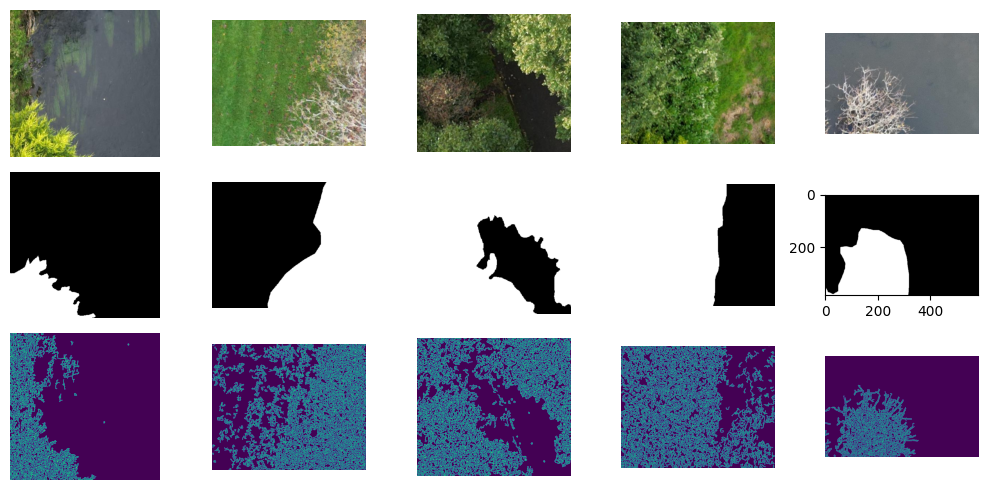

In [207]:
idx = [randint(0, 4322) for i in range(5)]
print(idx)
img_names = [os.path.join(IMG_DIR, img_list[i]) for i in idx]
ann_names = [os.path.join(ANN_DIR, ann_list[i]) for i in idx]
imgs = [cv2.imread(img) for img in img_names]
anns = [cv2.imread(ann) for ann in ann_names]

# for i in zip(img_names, ann_names):
#     print(i)

fig, axes = plt.subplots(3, 5, figsize=(10, 5))
axes = axes.flatten()
for i in range(5):
    img = imgs[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    
    ann = anns[i]*255
    axes[5+i].imshow(ann)

    canny_img = cv2.Canny(img, 50, 150)
    axes[10+i].imshow(canny_img)
    
    axes[i].axis('off')
    axes[4+i].axis('off')
    axes[10+i].axis('off')

plt.tight_layout()
plt.show()

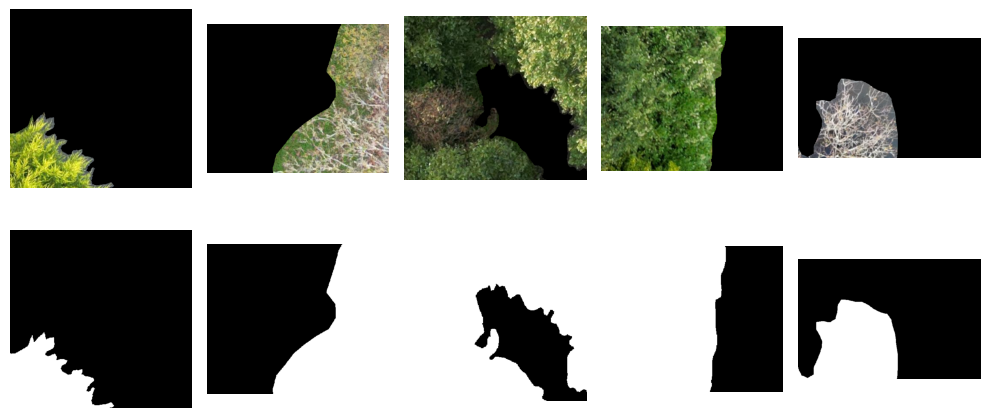

In [208]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for i in range(5):
    img = imgs[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    ann = anns[i]
    img = img*ann
    ann = ann*255
    
    axes[i].imshow(img)
    axes[5+i].imshow(ann)
    
    axes[i].axis('off')
    axes[5+i].axis('off')

plt.tight_layout()
plt.show()

In [209]:
def cal_mean_masked_area(img_file, ann_file):
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ann = cv2.imread(ann_file)
    img = img*ann
    img = img.transpose(2, 0, 1).reshape(3, -1)
    mean_R, mean_G, mean_B = np.mean(img, axis=1)/np.mean(img!=0)
    return img_file, ann_file, mean_R, mean_G, mean_B

In [210]:
result = []
for i in range(n_files):
    img_file = all_img_files[i]
    ann_file = all_ann_files[i]
    img_file, ann_file, mean_R, mean_G, mean_B = cal_mean_masked_area(img_file, ann_file)
    result.append([img_file, ann_file, mean_R, mean_G, mean_B])
len(result)

4322

In [211]:
output = pd.DataFrame(result, columns =['img_file', 'ann_file', 'mean_R', 'mean_G', 'mean_B'])
output

,img_file,ann_file,mean_R,mean_G,mean_B
0,data/public/img/train/001227c7aabb1b3bef1dedd7...,data/public/ann/train/001227c7aabb1b3bef1dedd7...,152.103820,157.214538,93.145592
1,data/public/img/train/0013ef9ba1dc270322ae715b...,data/public/ann/train/0013ef9ba1dc270322ae715b...,121.320345,139.581772,74.015751
2,data/public/img/train/001ac635ef288efcd55a8764...,data/public/ann/train/001ac635ef288efcd55a8764...,145.741579,119.735288,93.705526
3,data/public/img/train/003418d64812702a483b2605...,data/public/ann/train/003418d64812702a483b2605...,199.580219,189.858654,164.242611
4,data/public/img/train/00528c34c548446ace5e2c95...,data/public/ann/train/00528c34c548446ace5e2c95...,163.801780,172.221613,116.773537
...,...,...,...,...,...
4317,data/public/img/train/ffb6b6ed6b7d3c01a3c4936c...,data/public/ann/train/ffb6b6ed6b7d3c01a3c4936c...,127.041810,127.775194,104.923590
4318,data/public/img/train/ffb730a1680b071fe5debee5...,data/public/ann/train/ffb730a1680b071fe5debee5...,63.884001,84.770217,38.885229
4319,data/public/img/train/ffdf65d9155f9c194cf7f0e1...,data/public/ann/train/ffdf65d9155f9c194cf7f0e1...,149.504426,156.920743,115.127882
4320,data/public/img/train/ffe00be404132d04f35f4989...,data/public/ann/train/ffe00be404132d04f35f4989...,75.420381,98.413629,48.219651


In [212]:
# output.to_csv('color_EDA.csv', index=False)

In [324]:
X = np.array(output.drop(['img_file', 'ann_file'], axis=1))
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto", max_iter=1000).fit(X)
# clustering = AgglomerativeClustering(n_clusters=4).fit(X)
output['classify'] = kmeans.labels_
# output['classify'] = clustering.labels_
output.info(), output['classify'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   img_file  4322 non-null   object 
 1   ann_file  4322 non-null   object 
 2   mean_R    4322 non-null   float64
 3   mean_G    4322 non-null   float64
 4   mean_B    4322 non-null   float64
 5   classify  4322 non-null   int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 185.8+ KB


(None,
 classify
 0    2023
 1    1612
 2     687
 Name: count, dtype: int64)

In [325]:
# output['classify'].value_counts()

In [356]:
class_0 = output[output['classify'] == 0]
class_1 = output[output['classify'] == 1]
class_2 = output[output['classify'] == 2]
# class_3 = output[output['classify'] == 3]
# class_4 = output[output['classify'] == 4]
top_5_0 = (list(class_0['img_file'][50:55]), list(class_0['ann_file'][50:55]))
top_5_1 = (list(class_1['img_file'][50:55]), list(class_1['ann_file'][50:55]))
top_5_2 = (list(class_2['img_file'][50:55]), list(class_2['ann_file'][50:55]))
# top_5_3 = (list(class_3['img_file'][:5]), list(class_3['ann_file'][:5]))
# top_5_4 = (list(class_4['img_file'][:5]), list(class_4['ann_file'][:5]))
type(top_5_0[0])

list

In [357]:
def show_5_images(top_5_i):
    for i in range(5):
        img_file, ann_file = top_5_i[0][i], top_5_i[1][i]
        # print(img_file)
        # print(ann_file)
        img = cv2.imread(img_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
    
        ann = cv2.imread(ann_file)
        masked_area = img*ann
        axes[5+i].imshow(masked_area)
        
        ann = ann*255
        axes[10+i].imshow(ann)
    
        axes[i].axis('off')
        axes[5+i].axis('off')
        axes[10+i].axis('off')
        
    plt.tight_layout()
    plt.show()

In [358]:
show_5_images(top_5_0)

<Figure size 640x480 with 0 Axes>

class_0


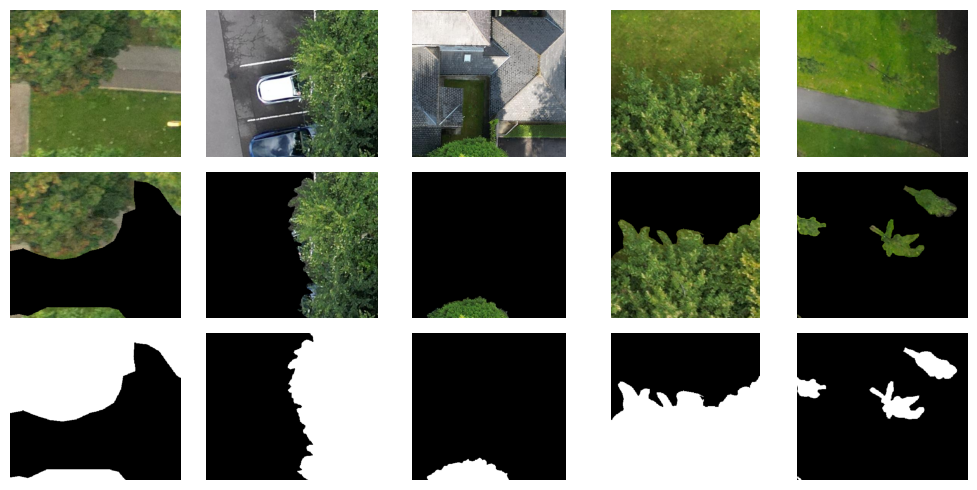

In [359]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
axes = axes.flatten()
print('class_0')
for i in range(5):
    # print(img_file)
    # print(ann_file)
    img_file, ann_file = top_5_0[0][i], top_5_0[1][i]
    # print(img_file)
    # print(ann_file)
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

    ann = cv2.imread(ann_file)
    masked_area = img*ann
    axes[5+i].imshow(masked_area)
    
    ann = ann*255
    axes[10+i].imshow(ann)

    axes[i].axis('off')
    axes[5+i].axis('off')
    axes[10+i].axis('off')
    

plt.tight_layout()
plt.show()

class_1


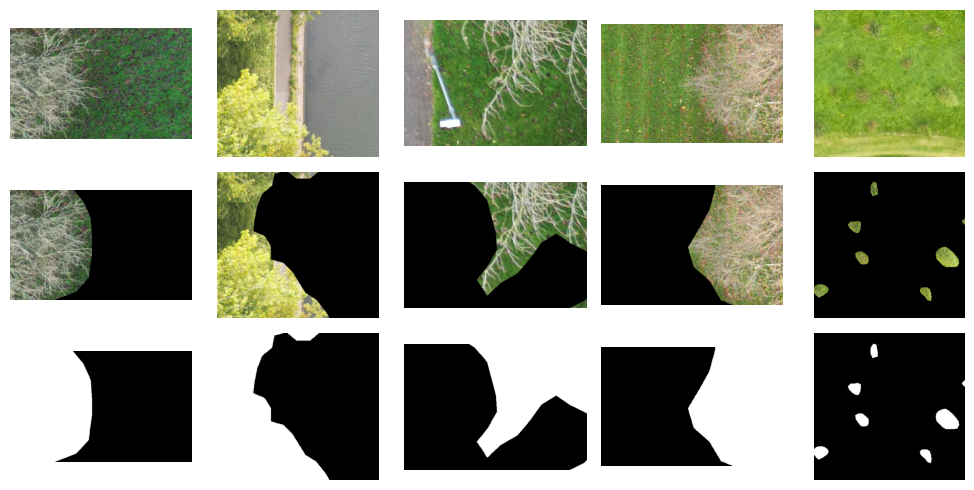

In [360]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
axes = axes.flatten()
print('class_1')
for i in range(5):
    # print(img_file)
    # print(ann_file)
    img_file, ann_file = top_5_1[0][i], top_5_1[1][i]
    # print(img_file)
    # print(ann_file)
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

    ann = cv2.imread(ann_file)
    masked_area = img*ann
    axes[5+i].imshow(masked_area)
    
    ann = ann*255
    axes[10+i].imshow(ann)

    axes[i].axis('off')
    axes[5+i].axis('off')
    axes[10+i].axis('off')
    

plt.tight_layout()
plt.show()

class_2


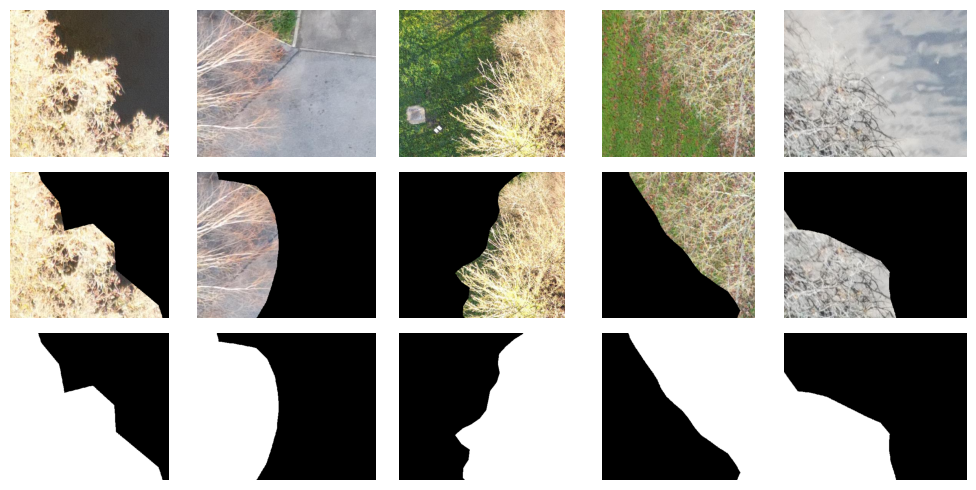

In [361]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
axes = axes.flatten()
print('class_2')
for i in range(5):
    # print(img_file)
    # print(ann_file)
    img_file, ann_file = top_5_2[0][i], top_5_2[1][i]
    # print(img_file)
    # print(ann_file)
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

    ann = cv2.imread(ann_file)
    masked_area = img*ann
    axes[5+i].imshow(masked_area)
    
    ann = ann*255
    axes[10+i].imshow(ann)

    axes[i].axis('off')
    axes[5+i].axis('off')
    axes[10+i].axis('off')
    

plt.tight_layout()
plt.show()

In [332]:
# fig, axes = plt.subplots(3, 5, figsize=(10, 5))
# axes = axes.flatten()

# for i in range(5):
#     # print(img_file)
#     # print(ann_file)
#     img_file, ann_file = top_5_3[0][i], top_5_3[1][i]
#     print(img_file)
#     print(ann_file)
#     img = cv2.imread(img_file)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     axes[i].imshow(img)

#     ann = cv2.imread(ann_file)
#     masked_area = img*ann
#     axes[5+i].imshow(masked_area)
    
#     ann = ann*255
#     axes[10+i].imshow(ann)

#     axes[i].axis('off')
#     axes[5+i].axis('off')
#     axes[10+i].axis('off')
    

# plt.tight_layout()
# plt.show()

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(5):
    # print(img_file)
    # print(ann_file)
    img_file, ann_file = top_5_4[0][i], top_5_4[1][i]
    print(img_file)
    print(ann_file)
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

    ann = cv2.imread(ann_file)
    masked_area = img*ann
    axes[5+i].imshow(masked_area)
    
    ann = ann*255
    axes[10+i].imshow(ann)

    axes[i].axis('off')
    axes[5+i].axis('off')
    axes[10+i].axis('off')
    

plt.tight_layout()
plt.show()

In [293]:
a = np.array([[[0, 0, 5, 2],
              [0, 0, 4, 1],
              [0, 0, 6, 2]],
            [[0, 0, 1, 2],
              [0, 0, 1, 1],
              [0, 0, 2, 2]],
            [[0, 0, 5, 5],
              [0, 0, 4, 4],
              [0, 0, 6, 4]]])
print(np.mean(a!=0))

a = np.sum(a, axis=2)#/np.mean(a!=0)
a

0.5


array([[ 7,  5,  8],
       [ 3,  2,  4],
       [10,  8, 10]])

(4, 2, 3)


(array([[155, 161, 215, 143, 221,   0, 236,   0],
        [ 33, 218, 142, 249,  71,   0,   4,   0],
        [129,   6, 235, 164, 229,   0, 177,   0]]),
 array([141.375,  89.625, 117.5  ]),
 188.5,
 119.5,
 156.66666666666666)

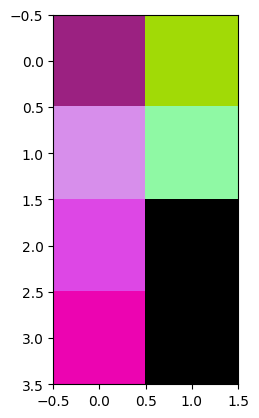

In [136]:
a = np.array([[[155,  33, 129],
        [161, 218,   6]],

       [[215, 142, 235],
        [143, 249, 164]],

       [[221,  71, 229],
        [ 0,  0, 0]],

       [[236,   4, 177],
        [0, 0,  0]]])
plt.imshow(a)
print(a.shape)
a = a.transpose(2,0,1).reshape(3,-1)


R,G,B = np.mean(a, axis=1)/np.mean(a!=0)
a, a.mean(axis=1), R, G, B

In [132]:
(155+ 161+ 215+ 143+ 221+   0+ 236+   0)/6

188.5